In [20]:
import matplotlib.pyplot as plt
# %matplotlib osx
%config InlineBackend.figure_format = 'retina'
import numpy as np
import simpleaudio as sa
from scipy.io import wavfile
import datetime
import wave
import sys
from scipy.fft import *
from scipy.io import wavfile
from scipy import signal
import pandas as pd
from matplotlib import animation
import moviepy.editor as mp

This project requires a .wav file and the notemap.csv file (all attached on bcourses).

In [21]:
filename = 'scriabin_cm.wav'
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()
play_obj.wait_done()  # Wait until sound has finished playing

In [22]:
def PrintArrayInfo(a,name=''):
    if (len(name)==0):
        print("Array info:")
    else:
        print("Array:", name)
    print("shape:", a.shape)
    print("dtype:", a.dtype)
    print("min, max:", a.min(), a.max())
    print()

def Play(rate,data):
    # Start playback
    play_obj = sa.play_buffer(data, 1, 2, rate)
    # Wait for playback to finish before exiting
    play_obj.wait_done()  

Data rate [units of Hz = 1/seconds] =  48000
Array: data
shape: (3016551, 2)
dtype: int16
min, max: -20152 22037



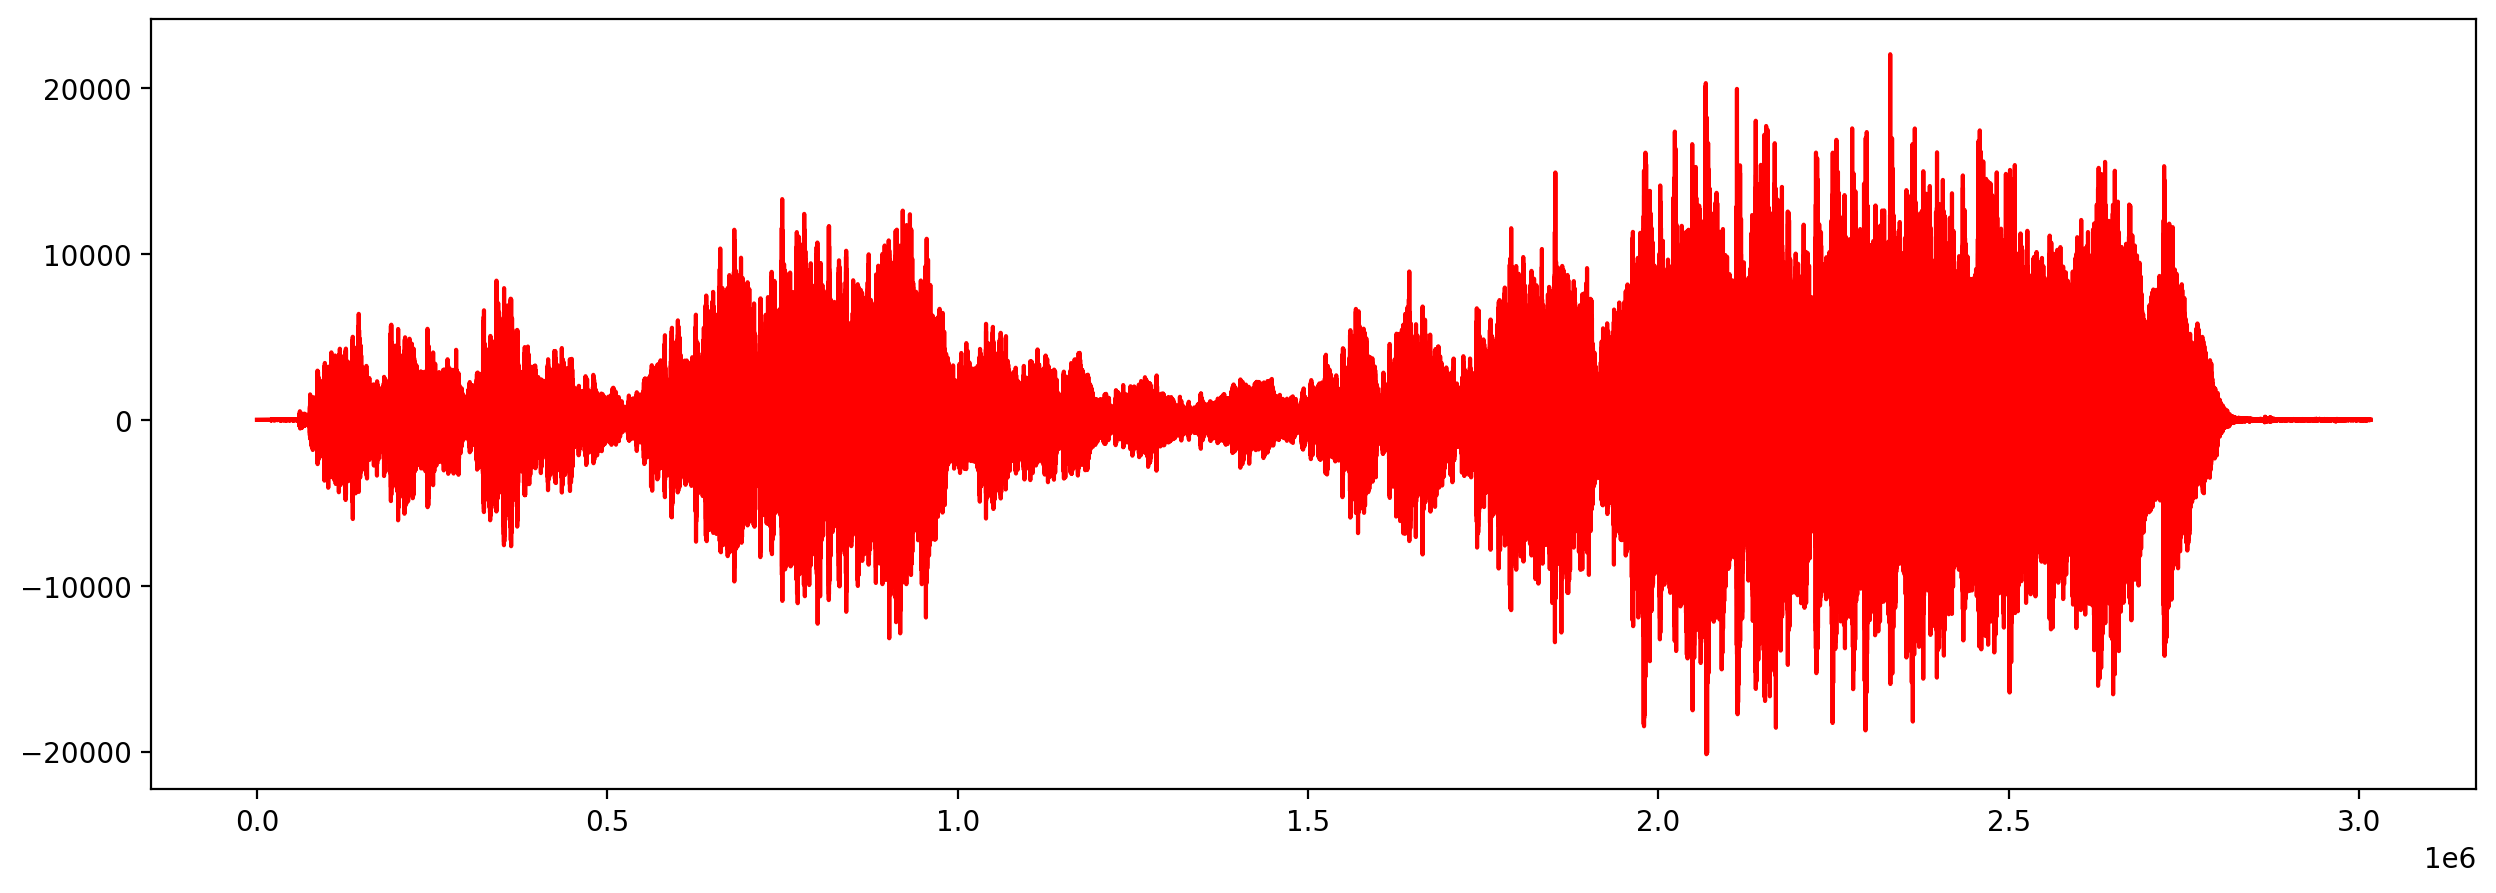

In [23]:
filename = 'scriabin_cm.wav'
rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",rate)
PrintArrayInfo(data,"data")

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(data,'r-')
plt.show()

In [24]:
wav_obj = wave.open('scriabin_cm.wav', 'rb')
sample_freq = wav_obj.getframerate()
n_samples = wav_obj.getnframes()
t_audio = n_samples/sample_freq
rate, aud = wavfile.read('scriabin_cm.wav')
aud = aud[:,0]

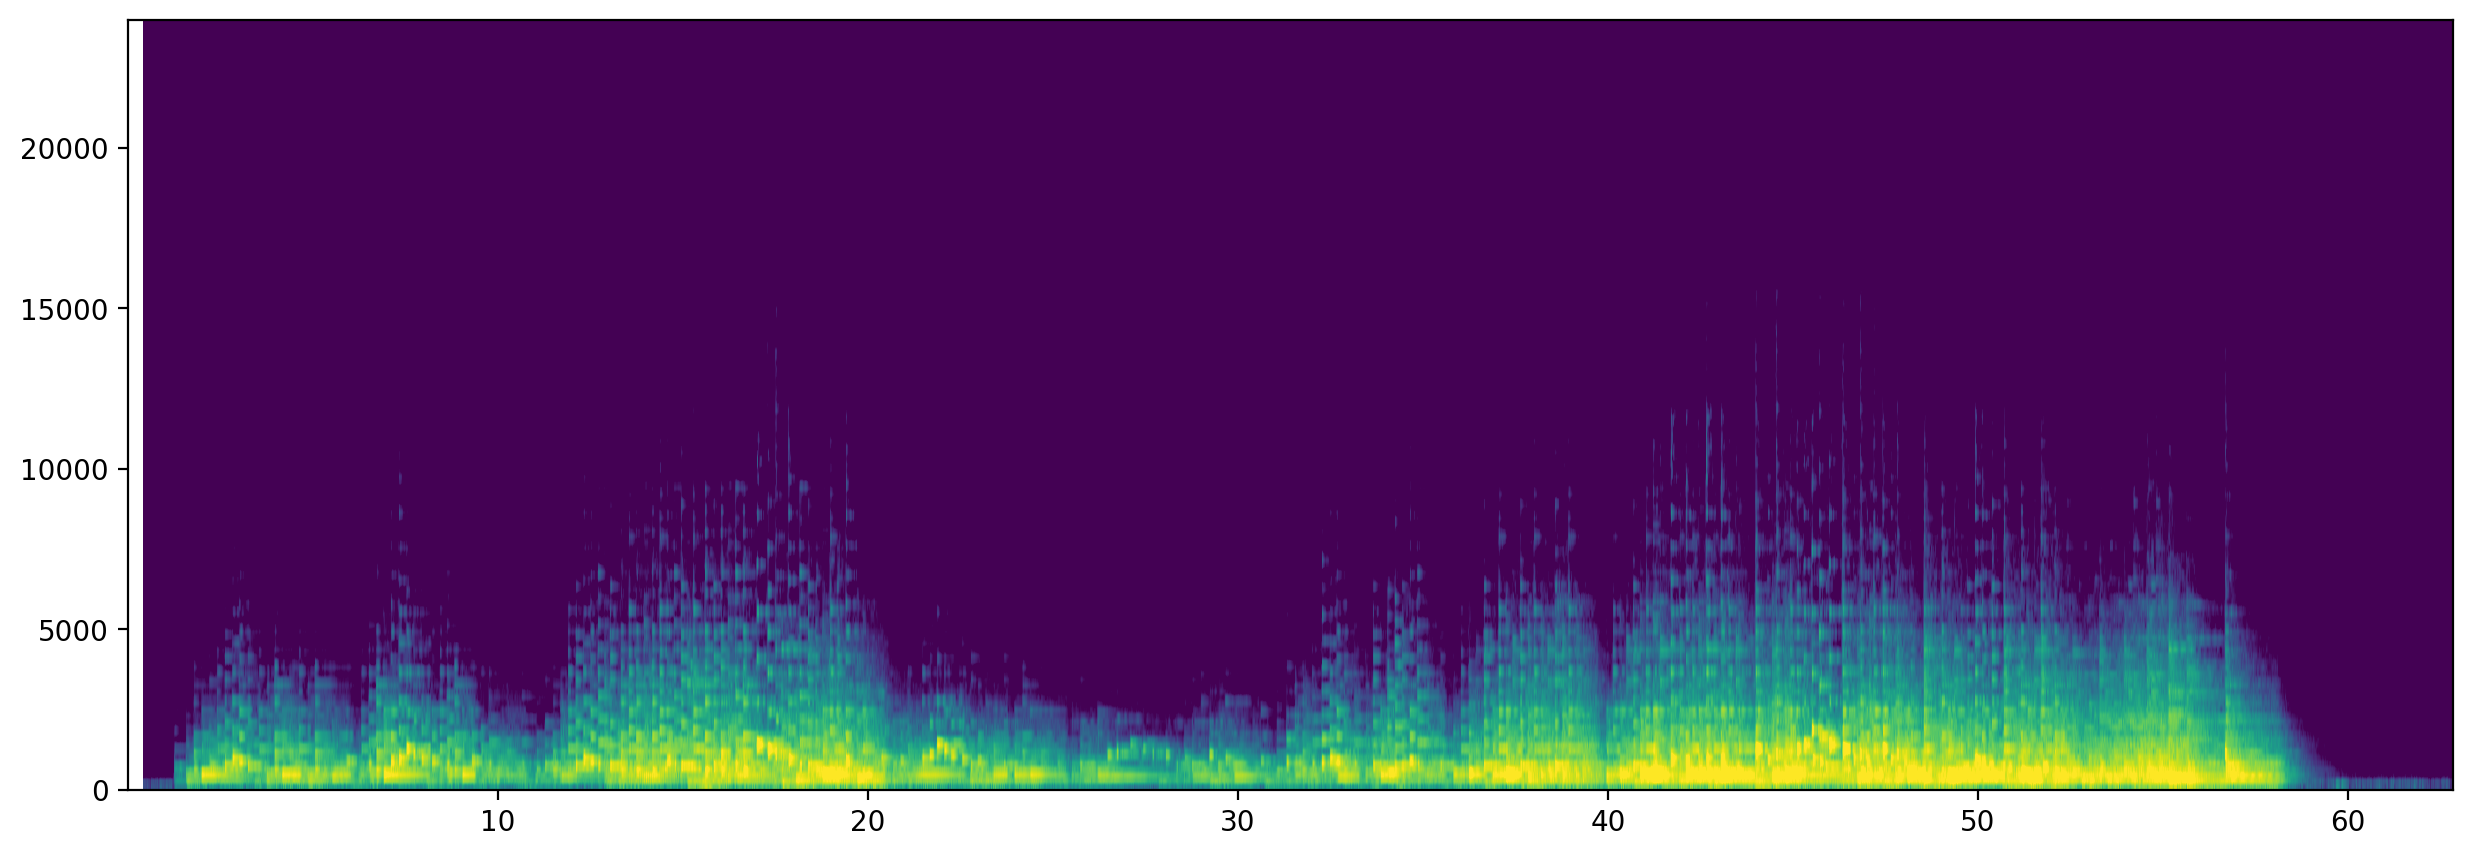

In [25]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud, Fs=rate, vmin = -20, vmax = 40)

In [26]:
def extract_peak_frequency(data, sampling_rate):
    fft_data = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(data))
    idx = np.argmax(np.abs(fft_data))
    peak_freq = freqs[idx]
    return abs(peak_freq * sampling_rate)

In [27]:
notemap = pd.read_csv('notemap.csv')
del notemap['Unnamed: 0']
notemap

C       C#        D       Eb        E        F       F#       G  \
0    16.35    17.32    18.35    19.45    20.60    21.83    23.12    24.5   
1    32.70    34.65    36.71    38.89    41.20    43.65    46.25    49.0   
2    65.41    69.30    73.42    77.78    82.41    87.31    92.50    98.0   
3   130.80   138.60   146.80   155.60   164.80   174.60   185.00   196.0   
4   261.60   277.20   293.70   311.10   329.60   349.20   370.00   392.0   
5   523.30   554.40   587.30   622.30   659.30   698.50   740.00   784.0   
6  1047.00  1109.00  1175.00  1245.00  1319.00  1397.00  1480.00  1568.0   
7  2093.00  2217.00  2349.00  2489.00  2637.00  2794.00  2960.00  3136.0   
8  4186.00  4435.00  4699.00  4978.00  5274.00  5588.00  5920.00  6272.0   

        G#       A       Bb        B  
0    25.96    27.5    29.14    30.87  
1    51.91    55.0    58.27    61.74  
2   103.80   110.0   116.50   123.50  
3   207.70   220.0   233.10   246.90  
4   415.30   440.0   466.20   493.90  
5   830.60   880.0   932.30   987.80  
6  1661.00  1760.0  1865.00  1976.00  
7  3322.00  3520.0  3729.00  3951.00  
8  6645.00  7040.0  7459.00  7902.00

In [28]:
all_notes = []
for i in range(9):
    all_notes.append(notemap.iloc[i])

all_notes = np.concatenate(np.array(all_notes))
all_notes_list = all_notes.tolist()

In [29]:
cols = np.array(notemap.columns)
notenames = []
for i in range(9):
    for col in cols:
        newname = col + str(i)
        notenames.append(newname)

In [30]:
# 12000 = data bits per 1/4 second
# GET THE MOST DOMINANT FREQUENCY FOR EVERY QUARTER SECOND INTERVAL OF MUSIC
ranges = np.arange(0, len(data), 6000)
peak_freqs = []
for i in range(len(ranges) - 1):
    pk = extract_peak_frequency(aud[ranges[i]:ranges[i+1]], rate)
    peak_freqs.append(pk)
print(peak_freqs)
print(len(peak_freqs))

[0.0, 0.0, 0.0, 32.0, 16.0, 8.0, 32.0, 8.0, 8.0, 40.0, 592.0, 592.0, 200.0, 296.0, 528.0, 391.99999999999994, 391.99999999999994, 391.99999999999994, 391.99999999999994, 391.99999999999994, 391.99999999999994, 664.0, 664.0, 880.0, 792.0, 783.9999999999999, 664.0, 664.0, 664.0, 592.0, 296.0, 296.0, 528.0, 391.99999999999994, 391.99999999999994, 391.99999999999994, 391.99999999999994, 391.99999999999994, 296.0, 192.0, 528.0, 528.0, 391.99999999999994, 391.99999999999994, 328.0, 391.99999999999994, 391.99999999999994, 391.99999999999994, 783.9999999999999, 783.9999999999999, 391.99999999999994, 391.99999999999994, 704.0, 464.0, 528.0, 391.99999999999994, 391.99999999999994, 391.99999999999994, 391.99999999999994, 880.0, 1184.0, 391.99999999999994, 391.99999999999994, 888.0, 880.0, 783.9999999999999, 783.9999999999999, 783.9999999999999, 592.0, 464.0, 464.0, 528.0, 391.99999999999994, 391.99999999999994, 391.99999999999994, 783.9999999999999, 783.9999999999999, 391.99999999999994, 440.0, 4

In [31]:
def closest(lst, K):
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]    

In [32]:
test_keys = all_notes_list
test_values = notenames
 
res = dict(zip(test_keys, test_values))

In [33]:
# SCRIBIAN'S KEYBOARD, assign colors to notes
colors = []
for note in notenames:
    if 'C' in str(note) and '#' not in str(note):
        colors.append('red')
    elif 'C#' in str(note):
        colors.append('lavender')
    elif 'D' in str(note):
        colors.append('yellow')
    elif 'Eb' in str(note):
        colors.append('purple')
    elif 'E' in str(note) and 'b' not in str(note):
        colors.append('lightblue')
    elif 'F' in str(note) and '#' not in str(note):
        colors.append('darkred')
    elif 'F#' in str(note):
        colors.append('cyan')
    elif 'G' in str(note) and '#' not in str(note):
        colors.append('orange')
    elif 'G#' in str(note):
        colors.append('hotpink')
    elif 'A' in str(note):
        colors.append('green')
    elif 'Bb' in str(note):
        colors.append('slategrey')
    elif 'B' in str(note) and 'b' not in str(note):
        colors.append('blue')

In [34]:
color_key = dict(zip(notenames, colors))

In [35]:
scribian_colors = []
for f in peak_freqs:
    close = closest(all_notes, f)
    note = res[close]
    color = color_key[note]
    scribian_colors.append(color)

print(len(scribian_colors))

502


ANIMATE THE DOMINANT FREQUENCIES

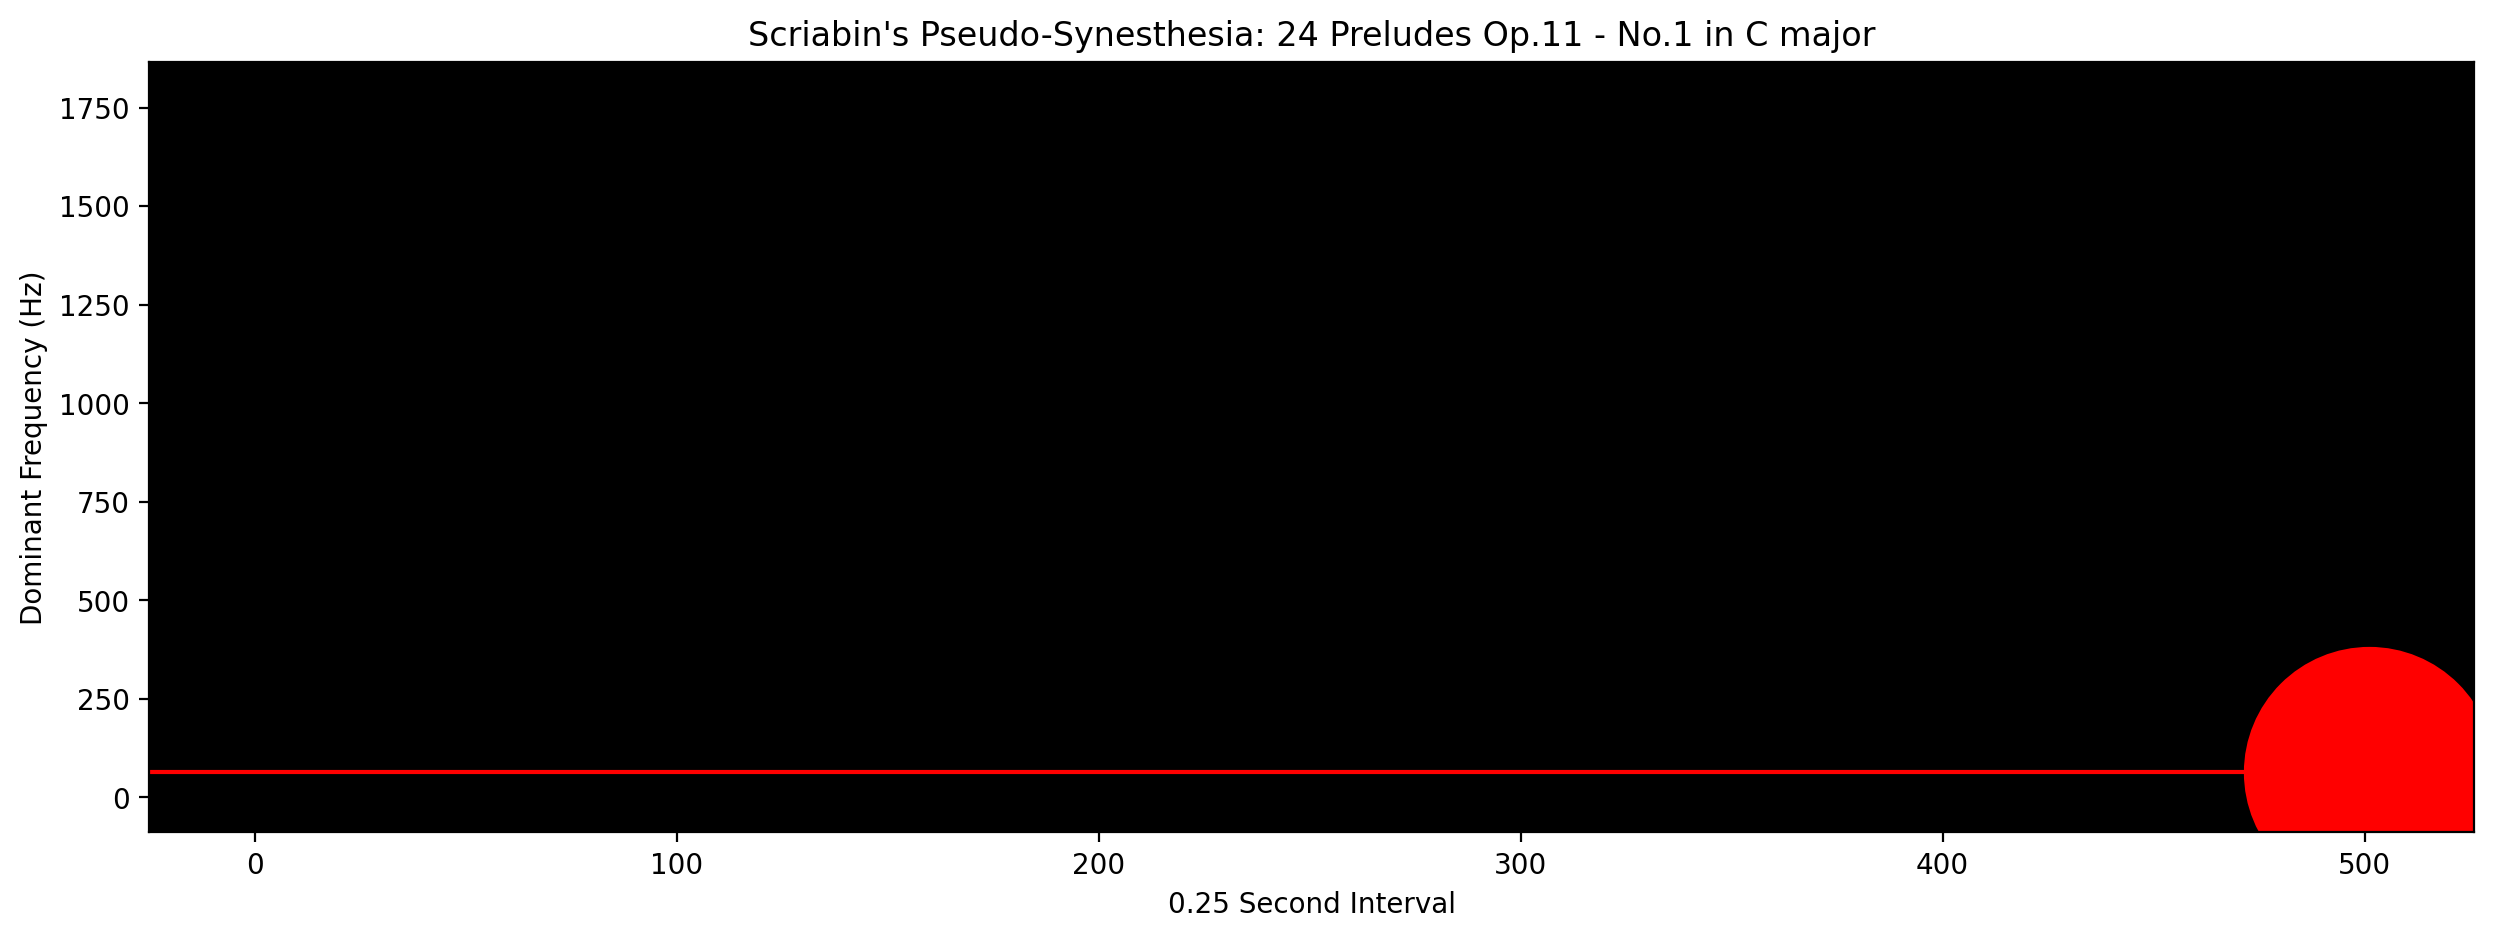

In [36]:
frames = [] # for storing the generated images\n",
fig, ax = plt.subplots()
ax.set_title("Scriabin's Pseudo-Synesthesia: 24 Preludes Op.11 - No.1 in C major")
ax.set_facecolor('black')
ax.set_xlabel('1/8 Second Interval')
ax.set_ylabel('Dominant Frequency (Hz)')

x = np.arange(0, len(scribian_colors), 1)

for i in range(len(scribian_colors)):
    frames.append([plt.scatter(x[i], peak_freqs[i], color=scribian_colors[i],s=8000), 
                   plt.axhline(peak_freqs[i], color = scribian_colors[i])])

ani = animation.ArtistAnimation(fig, frames, interval=125, blit=True,
                                repeat_delay=1000)

ani.save('animation_noaudio_1.mp4')
plt.show()

In [37]:
# layer the audio
audio = mp.AudioFileClip('Scriabin 24 Preludes Op.11 - No.1 in C major.mp3')
video1 = mp.VideoFileClip('animation_noaudio_1.mp4')
final = video1.set_audio(audio)
final.write_videofile("animation_1.mp4", codec='libx264', 
                     audio_codec='aac', 
                     temp_audiofile='temp-audio.m4a', 
                     remove_temp=True
                     )

Moviepy - Building video animation_1.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video animation_1.mp4



Moviepy - Done !
Moviepy - video ready animation_1.mp4
